In [31]:
import numpy as np
from math import log, sqrt
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import random

# Question 1

Originally prior is in exponential form and posterior is in the multiplicative form. We need functions that compute the logarithm of the prior and logarithm of the posterior because then prior in the summation form and posterior as a constant is easier to calculate so it saves time.

# Question 2

The form of the acceptance ratio P(W'|D)/P(W|D) is convenient because the Bayesian formula of conditional probbaility for P(W'|D) and P(W|D) both have the same denominator. And when we take the ratio P(W'|D)/P(W|D), the denominators will cancel out and so we don't have to actually calculate the integral part.

# Question 3

In [32]:
def log_likelihood(n1, n2, a, W): 
    # this function takes a numpy array for n1, n2, and the accuracy (0/1), whetherthey answerd correctly    
    # as well as W (the hypothesis)    
    # and returns the *log* likelihood of the responses, log P(accuracy | n1, n2, W)    
    
    assert(len(n1) == len(n2) == len(a))    
    p = 1.0-scipy.stats.norm.cdf(0, loc=np.abs(n1-n2), scale=W*np.sqrt(n1**2 + n2**2)) 
    # the probability of answering correctly    
    return np.sum(np.where(a, np.log(p), np.log(1.0-p)))

In [33]:
data = pd.read_csv('Assignment9-data.csv')

In [34]:
def log_prior(w):
    if w < 0:
        return float('-inf')
    else:
        return np.log(np.exp(-w))

def log_posterior(w, data):
    n1 = data['n1']
    n2 = data['n2']
    correct = data['correct']
    return log_prior(w)+log_likelihood(n1, n2, correct, w)

When W<0, it should return float(-inf)

# Question 4

In [318]:
def run_MH(steps, data, step_length=0.05):
    w_samples = []
    posterior_samples = []
    curr_w =np.random.randn()
    curr_post = log_posterior(curr_w,data)
    for step in range(steps):
        prop_w = curr_w + np.random.randn()*step_length
        prop_post = log_posterior(prop_w,data)
        if ((prop_post > curr_post) or (np.exp(prop_post-curr_post) > random.random())): 
            curr_w = prop_w
            curr_post = prop_post
        w_samples.append(curr_w)
        posterior_samples.append(curr_post)
    return w_samples, posterior_samples

In [319]:
w_samples, posterior_samples = run_MH(300,data)

# 4a.

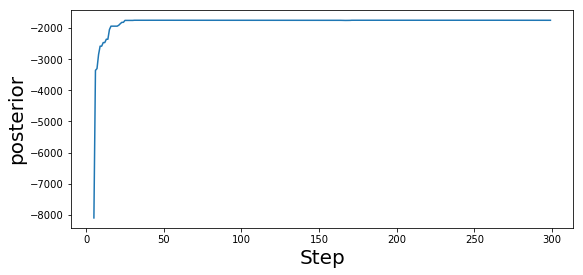

In [63]:
plt.figure()
plt.xlabel("Step", size=20)
plt.ylabel("posterior", size=20)
plt.plot(list(range(300)),posterior_samples)
plt.show()

# 4b.

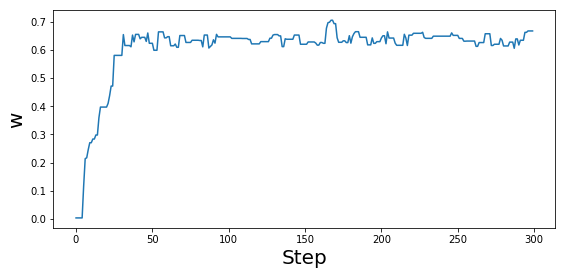

In [62]:
plt.figure()
plt.xlabel("Step", size=20)
plt.ylabel("w", size=20)
plt.plot(list(range(300)),w_samples)
plt.show()

# 4c.

In [298]:
w_samples,posterior_samples = run_MH(10000,data,0.001)

In [299]:
w_samples,posterior_samples = w_samples[1000:],posterior_samples[1000:]

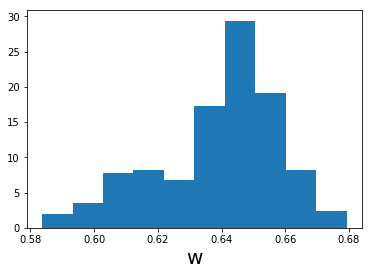

In [300]:
plt.hist(w_samples, normed = True)
plt.xlabel("w", size=20)
plt.show()

# Question 5

In [324]:
w_samples,posterior_samples = run_MH(10000,data,0.001)

In [325]:
count=0
for w in w_samples:
    if ((w>0.6) and (w<0.65)): 
        count+=1
print('the probability of w falling into [0.6,0.65] is', count/10000)

the probability of w falling into [0.6,0.65] is 0.7889


# Question 6

In [303]:
def run_MH_prior(steps, step_length=0.05):
    wp_samples = []
    prior_samples = []
    curr_w =np.random.randn()
    curr_prior = log_prior(curr_w)
    for step in range(steps):
        prop_w = curr_w + np.random.randn()*step_length
        prop_prior = log_prior(prop_w)
        if ((prop_prior > curr_prior) or (np.exp(prop_prior-curr_prior) > random.random())): 
            curr_w = prop_w
            curr_prior = prop_prior
        wp_samples.append(curr_w)
        prior_samples.append(curr_prior)
    return wp_samples, prior_samples

In [160]:
wp_samples,prior_samples = run_MH_prior(10000,0.001)

In [161]:
wp_samples,prior_samples = wp_samples[1000:],prior_samples[1000:]

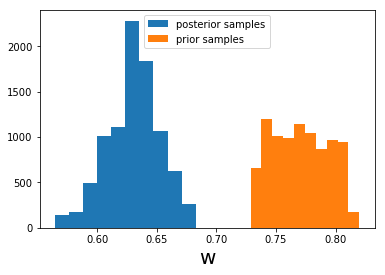

In [171]:
plt.hist(w_samples, label="posterior samples")
plt.hist(wp_samples, label="prior samples")
plt.legend(loc='upper center')

plt.xlabel("w", size=20)
plt.show()

The plot distinguishes between both distributions because the prior is calculated throught the MH function without taking in any data.

# Question 7

In [335]:
def run_MH(steps, data, step_length=0.05):
    w_samples = []
    posterior_samples = []
    curr_w =np.random.randn()
    curr_post = log_posterior(curr_w,data)
    for step in range(steps):
        prop_w = curr_w + np.random.randn()*step_length
        prop_post = log_posterior(prop_w,data)
        if ((prop_post > curr_post) or (np.exp(prop_post-curr_post) > random.random())): 
            curr_w = prop_w
            curr_post = prop_post
        w_samples.append(curr_w)
    return w_samples

In [336]:
w_1000_samples= run_MH(1000,data)

In [354]:
w_10_samples =[]
for i in range(100):
    w_10_samples.extend(run_MH(10,data))
    w_10_average = np.sum(w_10_samples)

/Users/gyelgireddy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/gyelgireddy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


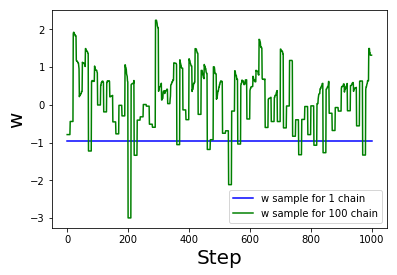

In [355]:
plt.figure()
plt.xlabel("Step", size=20)
plt.ylabel("w", size=20)
plt.plot(list(range(1000)),w_1000_samples,'b', label = "w sample for 1 chain")
plt.plot(list(range(1000)),w_10_samples,'g', label = "w sample for 100 chain")
plt.legend(loc = "lower right")
plt.show()

Both simulations are different where the graph with 100 chains of 10 steps is more volatile. I think the measure of goodness is a little off where the graph with 100 chains has more fluctuations